In [45]:
import os
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import astropy.units as u
from astropy import constants as const

############################
# Custom scripts
import get_ZdepSFRD as Z_SFRD
import paths
import init_values as In

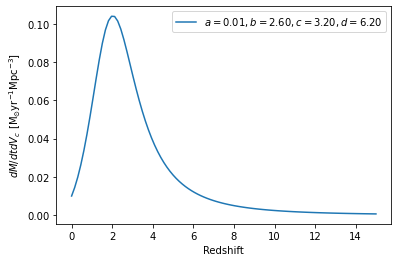

In [46]:
# plot SFRD(z)

redshift_list  = np.linspace(0,15, num=100)
y_vals = Z_SFRD.Madau_Dickinson2014(redshift_list, a=0.01, b=2.6, c=3.2,  d=6.2) #test with M&F 2017 vals
plt.plot(redshift_list, y_vals,label = '$a=%.2f, b=%.2f, c=%.2f, d=%.2f$'% (0.01, 2.6, 3.2,  6.2))
plt.xlabel("Redshift")
plt.ylabel(r'$dM/dt dV_c$ $\mathrm{[M_{\odot} yr^{-1} Mpc^{-3}]}$')
plt.legend();

## dP/dlogZ

In [47]:
fit_param_filename = 'test_best_fit_parameters_TNG100.txt'
mu0_best, muz_best, omega0_best, omegaz_best, alpha0_best,sf_a_best, sf_b_best, sf_c_best, sf_d_best = np.loadtxt(str(paths.data)+'/'+fit_param_filename,unpack=True, delimiter=',')

In [48]:
mu0 = mu0_best
muz = muz_best
omega0 = omega0_best
omegaz = omegaz_best
alpha = alpha0_best

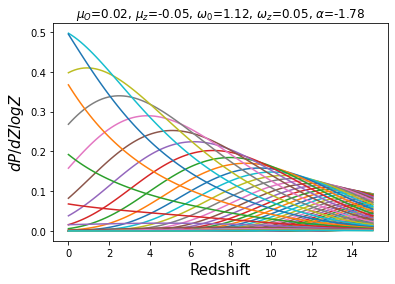

In [54]:
#dPdlogZ over redshift
metal_bins = np.logspace(-10, 0, 61) #60 bins
center_Zbin = (metal_bins[:-1] + metal_bins[1:])/2

dPdlogZ, metallicities, step_logZ, p_draw_metallicity = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=omegaz, alpha =alpha, metals=center_Zbin)

for i in range(0, 60): #indices:
    plt.plot(redshift_list, dPdlogZ[:,i],label=metallicities[i])
plt.xlabel("Redshift", size=15)
plt.ylabel(r"$dP/dZlogZ$", size=15)
plt.title(label=r'$\mu_O$=%.2f, $\mu_z$=%.2f, $\omega_0$=%.2f, $\omega_z$=%.2f, $\alpha$=%.2f'%(mu0, muz, omega0, omegaz, alpha));
plt.savefig("dPdlogZvsredshift_all.png")
#plt.legend();

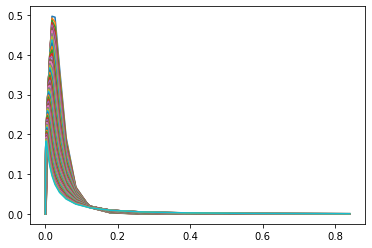

In [55]:
#dPdlogZ over metallicity
for i in range(0,60):
    plt.plot(metallicities, dPdlogZ[i,:])

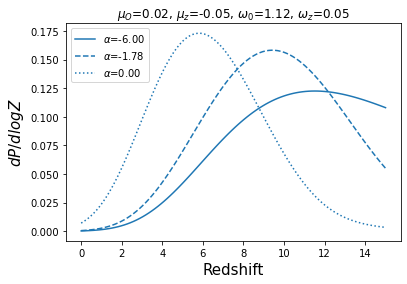

In [57]:
dPdlogZ1, metallicities1, step_logZ1, p_draw_metallicity1 = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=omegaz, alpha =-6, metals=center_Zbin)
dPdlogZ2, metallicities2, step_logZ2, p_draw_metallicity2 = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=omegaz, alpha =0, metals=center_Zbin)

indices = np.arange(0, 60, 10)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ1[:,i], c=colors[j], ls='-', label=r'$\alpha$=%.2f'%-6)
    else:
        plt.plot(redshift_list, dPdlogZ1[:,i], c=colors[j], ls='-')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ[:,i], c=colors[j], ls='--', label=r'$\alpha$=%.2f'%alpha)
    else:
        plt.plot(redshift_list, dPdlogZ[:,i], c=colors[j], ls='--')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ2[:,i], c=colors[j], ls=':', label=r'$\alpha$=%.2f'%0)
    else:
        plt.plot(redshift_list, dPdlogZ2[:,i], c=colors[j], ls=':')
plt.xlabel("Redshift", size=15)
plt.ylabel(r"$dP/dlogZ$", size=15)
plt.title(label=r'$\mu_O$=%.2f, $\mu_z$=%.2f, $\omega_0$=%.2f, $\omega_z$=%.2f'%(mu0, muz, omega0, omegaz))
plt.legend();

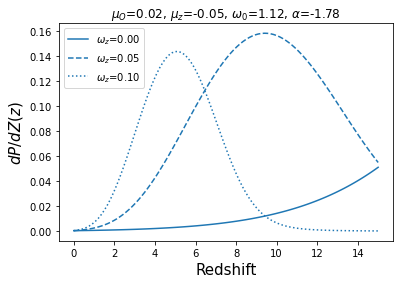

In [58]:
dPdlogZ3, metallicities3, step_logZ3, p_draw_metallicity3 = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=0, alpha =alpha, metals=center_Zbin)
dPdlogZ4, metallicities2, step_logZ4, p_draw_metallicity4 = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=0.1, alpha =alpha, metals=center_Zbin)

indices = np.arange(0, 60, 10)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ3[:,i], c=colors[j], ls='-', label=r'$\omega_z$=%.2f'%0)
    else:
        plt.plot(redshift_list, dPdlogZ3[:,i], c=colors[j], ls='-')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ[:,i], c=colors[j], ls='--', label=r'$\omega_z$=%.2f'%omegaz)
    else:
        plt.plot(redshift_list, dPdlogZ[:,i], c=colors[j], ls='--')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ4[:,i], c=colors[j], ls=':', label=r'$\omega_z$=%.2f'%0.1)
    else:
        plt.plot(redshift_list, dPdlogZ4[:,i], c=colors[j], ls=':')
plt.xlabel("Redshift", size=15)
plt.ylabel(r"$dP/dZ(z)$", size=15)
plt.title(label=r'$\mu_O$=%.2f, $\mu_z$=%.2f, $\omega_0$=%.2f, $\alpha$=%.2f'%(mu0, muz, omega0, alpha))
plt.legend();

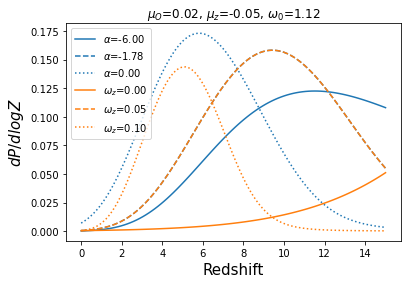

In [60]:
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ1[:,i], c='tab:blue', ls='-', label=r'$\alpha$=%.2f'%-6)
    else:
        plt.plot(redshift_list, dPdlogZ1[:,i], c='tab:blue', ls='-')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ[:,i], c='tab:blue', ls='--', label=r'$\alpha$=%.2f'%alpha)
    else:
        plt.plot(redshift_list, dPdlogZ[:,i], c='tab:blue', ls='--')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ2[:,i], c='tab:blue', ls=':', label=r'$\alpha$=%.2f'%0)
    else:
        plt.plot(redshift_list, dPdlogZ2[:,i], c='tab:blue', ls=':')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ3[:,i], c='tab:orange', ls='-', label=r'$\omega_z$=%.2f'%0)
    else:
        plt.plot(redshift_list, dPdlogZ3[:,i], c='tab:orange', ls='-')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ[:,i], c='tab:orange', ls='--', label=r'$\omega_z$=%.2f'%omegaz)
    else:
        plt.plot(redshift_list, dPdlogZ[:,i], c=colors[j], ls='--')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ4[:,i], c='tab:orange', ls=':', label=r'$\omega_z$=%.2f'%0.1)
    else:
        plt.plot(redshift_list, dPdlogZ4[:,i], c='tab:orange', ls=':')
plt.xlabel("Redshift", size=15)
plt.ylabel(r"$dP/dlogZ$", size=15)
plt.title(label=r'$\mu_O$=%.2f, $\mu_z$=%.2f, $\omega_0$=%.2f'%(mu0, muz, omega0))
plt.legend();
plt.savefig('dPdlogZ_comparison.png', bbox_inches='tight')

In [15]:
#low -> high resolution = skewness (alpha) increases (less negative, less skewed)
#low -> high resolution = redshift evolution of variance (omega_z) increases

In [16]:
# at a certain redshift, probability of getting a particular logZ

In [17]:
#lower resolution, more skewed distribution, lower redshift evol of variance, -6, 0
#higher resolution, less skewed distribution, higher redshift evol of variance, 0, 0.1

### Plot dP/dlogZ vs logZ for binned redshifts

In [61]:
lowz = (redshift_list < 2)
midz = ((redshift_list >= 2) & (redshift_list < 4))
highz = ((redshift_list >= 4) & (redshift_list < 6))

In [62]:
lowz_dPdlogZ = dPdlogZ[:,][lowz]
midz_dPdlogZ = dPdlogZ[:,][midz]
highz_dPdlogZ = dPdlogZ[:,][highz]
logZ = np.log(metallicities)
log10Z = np.log10(metallicities)
Zsun = Zsun = 0.014 # Solar metallicity

In [75]:
lowz_meanZ = np.mean(mu0 * 10**(muz * redshift_list[lowz]))
midz_meanZ = np.mean(mu0 * 10**(muz * redshift_list[midz]))
highz_meanZ = np.mean(mu0 * 10**(muz * redshift_list[highz]))
print(lowz_meanZ, midz_meanZ, highz_meanZ)

0.022103906184725013 0.01758220335199613 0.014108914959336687


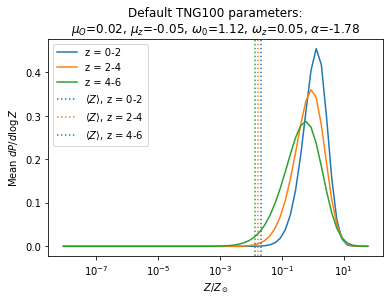

In [76]:
#default TNG100 parameters
plt.plot(metallicities/Zsun, np.mean(lowz_dPdlogZ, axis=0), label="z = 0-2")
plt.plot(metallicities/Zsun, np.mean(midz_dPdlogZ, axis=0), label="z = 2-4")
plt.plot(metallicities/Zsun, np.mean(highz_dPdlogZ, axis=0), label="z = 4-6")
plt.xlabel(r"$Z/Z_\odot$")
plt.ylabel("Mean " + r"$dP/d\logZ$")
plt.xscale("log")
plt.axvline(x = lowz_meanZ, color = 'tab:blue', ls=":", label = r'$\langle Z \rangle$, z = 0-2')
plt.axvline(x = midz_meanZ, color = 'tab:orange', ls=":", label = r'$\langle Z \rangle$, z = 2-4')
plt.axvline(x = highz_meanZ, color = 'tab:green', ls=":", label = r'$\langle Z \rangle$, z = 4-6')
plt.legend()
plt.title('Default TNG100 parameters:'+'\n'+r'$\mu_O$=%.2f, $\mu_z$=%.2f, $\omega_0$=%.2f, $\omega_z$=%.2f, $\alpha$=%.2f'%(mu0, muz, omega0, omegaz, alpha));

In [77]:
#low skewness, high redshift evol of variance

dPdlogZ1, metallicities1, step_logZ1, p_draw_metallicity1 = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=0.1, alpha =-6, metals=center_Zbin)

#high skewness, low redshift evol of variance
dPdlogZ2, metallicities2, step_logZ2, p_draw_metallicity2 = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=0, alpha =0, metals=center_Zbin)

lowz_dPdlogZ1 = dPdlogZ1[:,][lowz]
midz_dPdlogZ1 = dPdlogZ1[:,][midz]
highz_dPdlogZ1 = dPdlogZ1[:,][highz]

lowz_dPdlogZ2 = dPdlogZ2[:,][lowz]
midz_dPdlogZ2 = dPdlogZ2[:,][midz]
highz_dPdlogZ2 = dPdlogZ2[:,][highz]

In [78]:
#low skewness, large redshift evol of variance

dPdlogZ3, metallicities3, step_logZ3, p_draw_metallicity3 = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=0.1, alpha =0, metals=center_Zbin)

#high skewness, small redshift evol of variance
dPdlogZ4, metallicities4, step_logZ4, p_draw_metallicity4 = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=0, alpha =-6, metals=center_Zbin)

lowz_dPdlogZ3 = dPdlogZ3[:,][lowz]
midz_dPdlogZ3 = dPdlogZ3[:,][midz]
highz_dPdlogZ3 = dPdlogZ3[:,][highz]

lowz_dPdlogZ4 = dPdlogZ4[:,][lowz]
midz_dPdlogZ4 = dPdlogZ4[:,][midz]
highz_dPdlogZ4 = dPdlogZ4[:,][highz]

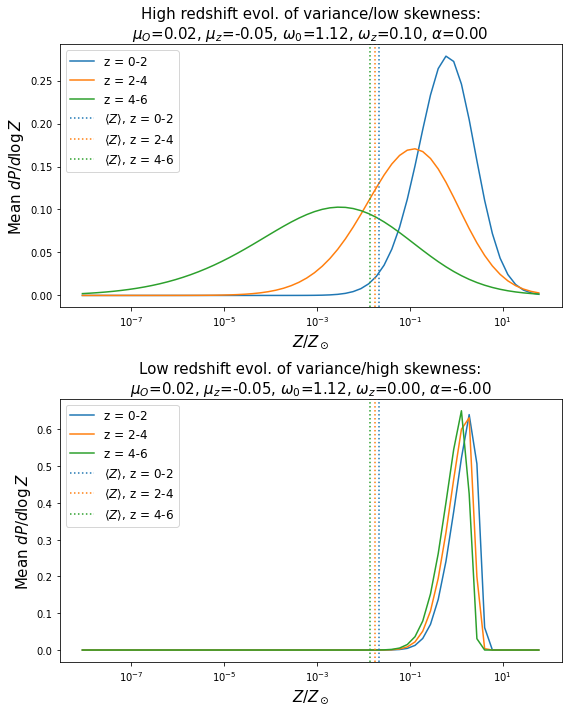

In [84]:
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

ax[0].plot(metallicities/Zsun, np.mean(lowz_dPdlogZ3, axis=0), label="z = 0-2")
ax[0].plot(metallicities/Zsun, np.mean(midz_dPdlogZ3, axis=0), label="z = 2-4")
ax[0].plot(metallicities/Zsun, np.mean(highz_dPdlogZ3, axis=0), label="z = 4-6")
ax[0].axvline(x = lowz_meanZ, color = 'tab:blue', ls=":", label = r'$\langle Z \rangle$, z = 0-2')
ax[0].axvline(x = midz_meanZ, color = 'tab:orange', ls=":", label = r'$\langle Z \rangle$, z = 2-4')
ax[0].axvline(x = highz_meanZ, color = 'tab:green', ls=":", label = r'$\langle Z \rangle$, z = 4-6')
ax[0].set_xlabel(r"$Z/Z_\odot$", fontsize=15)
ax[0].set_ylabel("Mean " + r"$dP/d\logZ$", fontsize=15)
ax[0].set_xscale("log")
ax[0].legend(fontsize=12)
ax[0].set_title('High redshift evol. of variance/low skewness:'+'\n'+r'$\mu_O$=%.2f, $\mu_z$=%.2f, $\omega_0$=%.2f, $\omega_z$=%.2f, $\alpha$=%.2f'%(mu0, muz, omega0, 0.1, 0), fontsize=15);

ax[1].plot(metallicities/Zsun, np.mean(lowz_dPdlogZ4, axis=0), label="z = 0-2")
ax[1].plot(metallicities/Zsun, np.mean(midz_dPdlogZ4, axis=0), label="z = 2-4")
ax[1].plot(metallicities/Zsun, np.mean(highz_dPdlogZ4, axis=0), label="z = 4-6")
ax[1].axvline(x = lowz_meanZ, color = 'tab:blue', ls=":", label = r'$\langle Z \rangle$, z = 0-2')
ax[1].axvline(x = midz_meanZ, color = 'tab:orange', ls=":", label = r'$\langle Z \rangle$, z = 2-4')
ax[1].axvline(x = highz_meanZ, color = 'tab:green', ls=":", label = r'$\langle Z \rangle$, z = 4-6')
ax[1].set_xlabel(r"$Z/Z_\odot$", fontsize=15)
ax[1].set_ylabel("Mean " + r"$dP/d\logZ$", fontsize=15)
ax[1].set_xscale("log")
ax[1].legend(fontsize=12)
ax[1].set_title('Low redshift evol. of variance/high skewness:'+'\n'+r'$\mu_O$=%.2f, $\mu_z$=%.2f, $\omega_0$=%.2f, $\omega_z$=%.2f, $\alpha$=%.2f'%(mu0, muz, omega0, 0,-6), fontsize=15);

fig.tight_layout()
fig.savefig('figures/parameter_variations_binned.png', bbox_inches='tight')

In [25]:
dPdlogZ5, metallicities5, step_logZ5, p_draw_metallicity5 = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=0.1, alpha =alpha, metals=center_Zbin)
dPdlogZ6, metallicities6, step_logZ6, p_draw_metallicity6 = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=0, alpha =alpha, metals=center_Zbin)
dPdlogZ7, metallicities7, step_logZ7, p_draw_metallicity7 = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=omegaz, alpha =-6, metals=center_Zbin)
dPdlogZ8, metallicities8, step_logZ8, p_draw_metallicity8 = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=omegaz, alpha =0, metals=center_Zbin)

lowz_dPdlogZ5 = dPdlogZ5[:,][lowz]
midz_dPdlogZ5 = dPdlogZ5[:,][midz]
highz_dPdlogZ5 = dPdlogZ5[:,][highz]

lowz_dPdlogZ6 = dPdlogZ6[:,][lowz]
midz_dPdlogZ6 = dPdlogZ6[:,][midz]
highz_dPdlogZ6 = dPdlogZ6[:,][highz]

lowz_dPdlogZ7 = dPdlogZ7[:,][lowz]
midz_dPdlogZ7 = dPdlogZ7[:,][midz]
highz_dPdlogZ7 = dPdlogZ7[:,][highz]

lowz_dPdlogZ8 = dPdlogZ8[:,][lowz]
midz_dPdlogZ8 = dPdlogZ8[:,][midz]
highz_dPdlogZ8 = dPdlogZ8[:,][highz]

logZ = np.log10(metallicities)

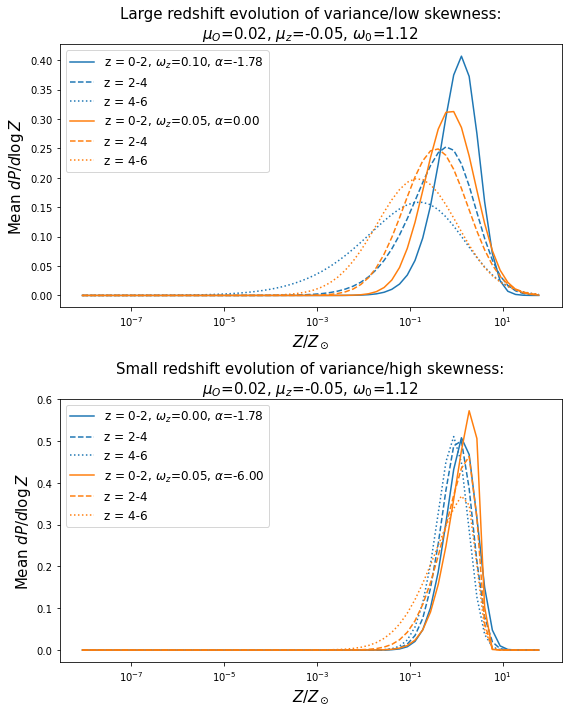

In [26]:
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

ax[0].plot(metallicities/Zsun, np.mean(lowz_dPdlogZ5, axis=0), c='tab:blue', linestyle='-', label=r"z = 0-2, $\omega_z$=%.2f, $\alpha$=%.2f"%(0.1, alpha))
ax[0].plot(metallicities/Zsun, np.mean(midz_dPdlogZ5, axis=0), c='tab:blue', linestyle='--', label="z = 2-4")
ax[0].plot(metallicities/Zsun, np.mean(highz_dPdlogZ5, axis=0), c='tab:blue', linestyle=':', label="z = 4-6")
ax[0].plot(metallicities/Zsun, np.mean(lowz_dPdlogZ8, axis=0), c='tab:orange', linestyle='-', label=r"z = 0-2, $\omega_z$=%.2f, $\alpha$=%.2f"%(omegaz, 0))
ax[0].plot(metallicities/Zsun, np.mean(midz_dPdlogZ8, axis=0), c='tab:orange', linestyle='--', label="z = 2-4")
ax[0].plot(metallicities/Zsun, np.mean(highz_dPdlogZ8, axis=0), c='tab:orange', linestyle=':', label="z = 4-6")
ax[0].set_xlabel(r"$Z/Z_\odot$", fontsize=15)
ax[0].set_ylabel("Mean " + r"$dP/d\logZ$", fontsize=15)
ax[0].set_xscale("log")
ax[0].legend(fontsize=12)
ax[0].set_title('Large redshift evolution of variance/low skewness:'+'\n'+r'$\mu_O$=%.2f, $\mu_z$=%.2f, $\omega_0$=%.2f'%(mu0, muz, omega0), fontsize=15);

ax[1].plot(metallicities/Zsun, np.mean(lowz_dPdlogZ6, axis=0), c='tab:blue', linestyle='-', label=r"z = 0-2, $\omega_z$=%.2f, $\alpha$=%.2f"%(0, alpha))
ax[1].plot(metallicities/Zsun, np.mean(midz_dPdlogZ6, axis=0), c='tab:blue', linestyle='--', label="z = 2-4")
ax[1].plot(metallicities/Zsun, np.mean(highz_dPdlogZ6, axis=0), c='tab:blue', linestyle=':', label="z = 4-6")
ax[1].plot(metallicities/Zsun, np.mean(lowz_dPdlogZ7, axis=0), c='tab:orange', linestyle='-', label=r"z = 0-2, $\omega_z$=%.2f, $\alpha$=%.2f"%(omegaz, -6))
ax[1].plot(metallicities/Zsun, np.mean(midz_dPdlogZ7, axis=0), c='tab:orange', linestyle='--', label="z = 2-4")
ax[1].plot(metallicities/Zsun, np.mean(highz_dPdlogZ7, axis=0), c='tab:orange', linestyle=':', label="z = 4-6")
ax[1].set_xlabel(r"$Z/Z_\odot$", fontsize=15)
ax[1].set_ylabel("Mean " + r"$dP/d\logZ$", fontsize=15)
ax[1].set_xscale("log")
ax[1].legend(fontsize=12)
ax[1].set_title('Small redshift evolution of variance/high skewness:'+'\n'+r'$\mu_O$=%.2f, $\mu_z$=%.2f, $\omega_0$=%.2f'%(mu0, muz, omega0), fontsize=15);

fig.tight_layout()
fig.savefig('figures/parameter_variations_binned2.png', bbox_inches='tight')

### Plot dP/dlogZ vs logZ as a 2D plot

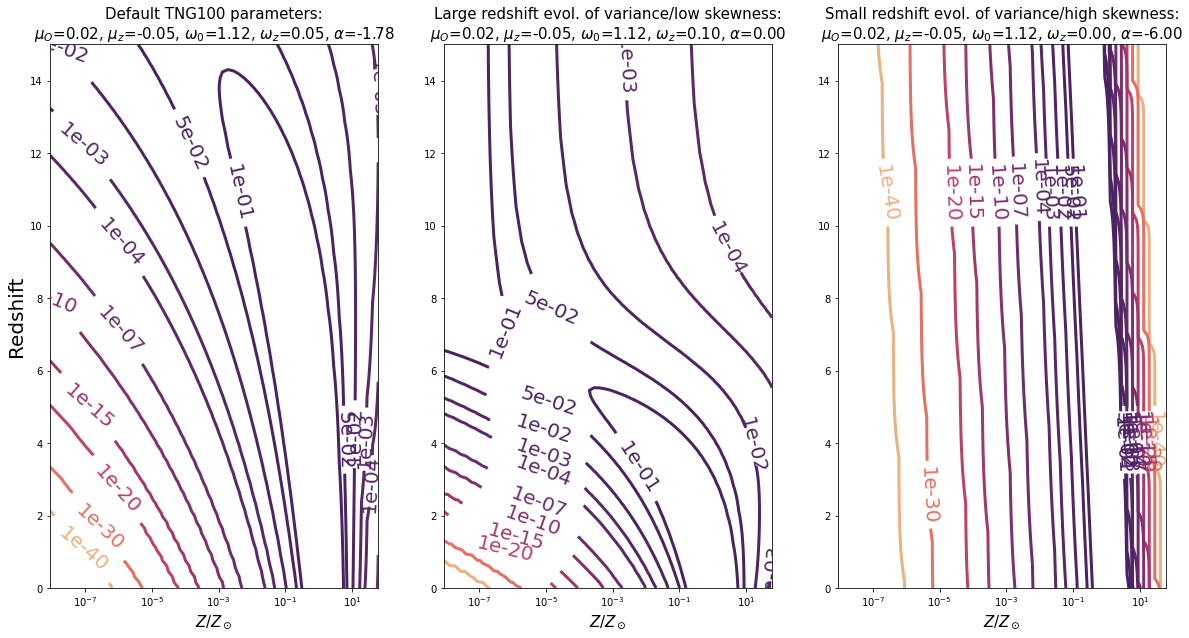

In [27]:
from matplotlib import ticker, cm
import seaborn as sns
fig, ax = plt.subplots(1, 3, figsize = (20,10))
levels = [1e-40, 1e-30, 1e-20, 1e-15, 1e-10, 1e-7, 1e-4,1e-3,1e-2,5e-2,1e-1]
cmap = sns.color_palette('flare', as_cmap=True)

cs = ax[0].contour(metallicities/Zsun, redshift_list, dPdlogZ, levels, cmap=cmap, linewidths=3, locator=ticker.LogLocator())
ax[0].clabel(cs,inline=1,levels = levels, fontsize=20, use_clabeltext=True, fmt = '%.0e')

ax[0].set_xlabel(r"$Z/Z_\odot$", fontsize=15)
ax[0].set_xscale("log")
ax[0].set_ylabel('Redshift', fontsize = 20)
ax[0].set_title('Default TNG100 parameters:'+'\n'+r'$\mu_O$=%.2f, $\mu_z$=%.2f, $\omega_0$=%.2f, $\omega_z$=%.2f, $\alpha$=%.2f'%(mu0, muz, omega0, omegaz, alpha), fontsize=15)

cs = ax[1].contour(metallicities/Zsun, redshift_list, dPdlogZ3, levels, cmap=cmap, linewidths=3, locator=ticker.LogLocator())
ax[1].clabel(cs,inline=1,levels = levels, fontsize=20, use_clabeltext=True, fmt = '%.0e')

ax[1].set_xlabel(r"$Z/Z_\odot$", fontsize=15)
ax[1].set_xscale("log")
ax[1].set_title('Large redshift evol. of variance/low skewness:'+'\n'+r'$\mu_O$=%.2f, $\mu_z$=%.2f, $\omega_0$=%.2f, $\omega_z$=%.2f, $\alpha$=%.2f'%(mu0, muz, omega0, 0.1, 0), fontsize=15)

cs = ax[2].contour(metallicities/Zsun, redshift_list, dPdlogZ4, levels, cmap=cmap, linewidths=3, locator=ticker.LogLocator())
ax[2].clabel(cs,inline=1,levels = levels, fontsize=20, use_clabeltext=True, fmt = '%.0e')

ax[2].set_xlabel(r"$Z/Z_\odot$", fontsize=15)
ax[2].set_xscale("log")
ax[2].set_title('Small redshift evol. of variance/high skewness:'+'\n'+r'$\mu_O$=%.2f, $\mu_z$=%.2f, $\omega_0$=%.2f, $\omega_z$=%.2f, $\alpha$=%.2f'%(mu0, muz, omega0, 0, -6), fontsize=15);

fig.savefig('figures/parameter_variations_2D.png', bbox_inches='tight')

## SFRD(Z, z)

In [28]:
redshift_list  = np.linspace(0,15, num=100)
dPdlogZ, metallicities, step_logZ, p_draw_metallicity = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=omegaz, alpha =alpha, metals=center_Zbin)
sfr = Z_SFRD.Madau_Dickinson2014(redshift_list, a=0.01, b=2.6, c=3.2,  d=6.2) #test with M&F 2017 vals
SFRD = (sfr* (dPdlogZ * step_logZ ).T).value

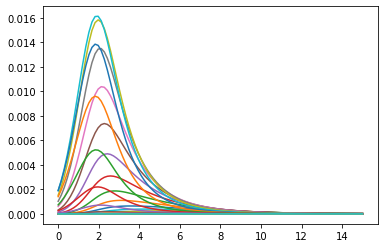

In [29]:
for i, val in enumerate(SFRD[:,0]):
    plt.plot(redshift_list, SFRD[i]);

In [30]:
with h5.File("data/SFRMetallicityFromGasTNG100-1.hdf5", "r") as f:
        MetalBins     = f["MetalBins"][:]
        Lookbacktimes = f["Lookbacktimes"][:]
        BoxSfr        = f["Sfr"][:]
        Redshifts     = f["Redshifts"][:]

Text(0, 0.5, 'SFRD')

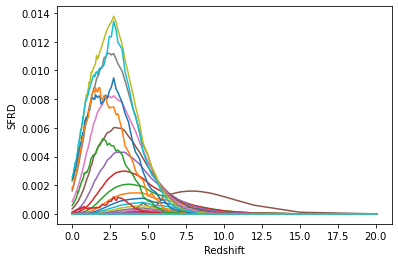

In [31]:
littleh  = 0.6774
Rbox     = 75/littleh
Sim_SFRD = BoxSfr / Rbox**3 *u.Mpc**-3
Sim_SFRD = Sim_SFRD.value

plt.plot(Redshifts, Sim_SFRD);
plt.xlabel('Redshift')
plt.ylabel("SFRD")
#plt.plot(Redshifts, np.mean(Sim_SFRD, axis=1));